In [2]:
#Importing of libraries
import pandas as pd
import numpy as np

In [4]:
cd 

/Users/kanth


In [5]:
cd Downloads

/Users/kanth/Downloads


In [6]:
heart = pd.read_csv('clevelanda.csv')

In [7]:
heart.head()

,age,gender,cp,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [ ]:
#cp: chest pain type -- Value 1: typical angina -- Value 2: atypical angina 
#-- Value 3: non-anginal pain -- Value 4: asymptomatic 
#trestbps is continuous data, chol: serum cholestoral in mg/dl 
#fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
#restecg - 0,1,2 - Discrete
#thalach: maximum heart rate achieved 
#exang: exercise induced angina (1 = yes; 0 = no) 
#oldpeak = ST depression induced by exercise relative to rest 
# slope: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping 
#ca: number of major vessels (0-3) colored by flourosopy 
# thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 
#classes = 0(Absence) (1,2,3,4) - Presence

In [9]:
heart.shape
#Client provided us with 303,14 columns of data

(303, 14)

In [10]:
heart.columns

Index(['age', 'gender', 'cp', 'trestbps', 'chol', 'fps', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'class'],
      dtype='object')

In [8]:
#checking for information about out dataset
heart.info()
#We're able to identify two object columns in our dataset, why they are object??

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
gender      303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fps         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null object
thal        303 non-null object
class       303 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [11]:
heart.head()

,age,gender,cp,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [14]:
heart['ca'].unique()

array(['0', '3', '2', '1', '?'], dtype=object)

In [12]:
heart['ca'].value_counts()
#We are able to identify '?' in our CA Column, how to treat it??

0    176
1     65
2     38
3     20
?      4
Name: ca, dtype: int64

In [15]:
heart['thal'].unique()

array(['6', '3', '7', '?'], dtype=object)

In [16]:
heart['thal'].value_counts()
#How to treat this two '?' in thal column??

3    166
7    117
6     18
?      2
Name: thal, dtype: int64

In [17]:
heart['class'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: class, dtype: int64

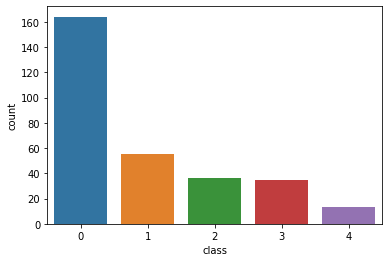

In [19]:
import seaborn as sns
sns.countplot(heart['class'])
#We're able to notice more data towards absence of heart diease and very less amot of data towards presen
#Due to this uneven data distribution, we may get good performance with absence and poor performace with presence
#We can see more misclassifications towards presnece of heart diease

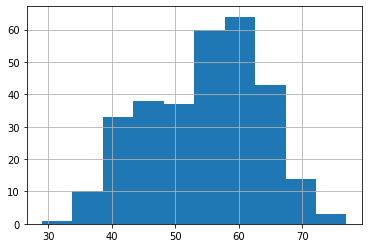

In [20]:
heart['age'].hist()

In [21]:
heart['age'].describe()

count    303.000000
mean      54.438944
std        9.038662
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

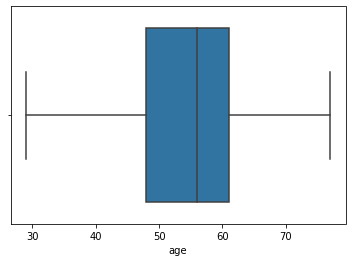

In [22]:
sns.boxplot(heart['age'])

In [24]:
from scipy.stats import skew

In [25]:
skew(heart['age'])
#Majority of data was concentre across 56 to 61 age group and due to higher age group concentration,
#we may see better results at those age groups and poor performance at another age groups.
#Once check the distribution, does this distribution match to your real time pat distribution(population)

-0.2080240895050745

In [26]:
from scipy.stats import kurtosis

In [27]:
kurtosis(heart['age'])
#Data which you provided may not be suffice for better stability, try to provide more data for more stability

-0.5345227201725988

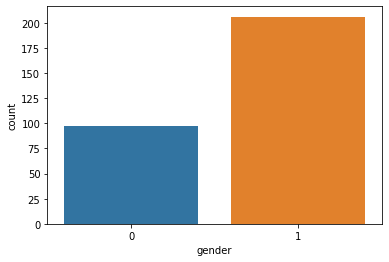

In [28]:
sns.countplot(heart['gender'])

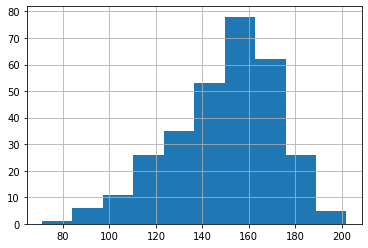

In [29]:
heart['thalach'].hist()

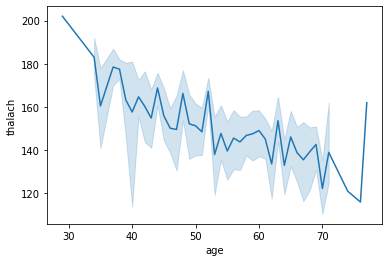

In [30]:
sns.lineplot(x = heart['age'], y= heart['thalach'])

In [31]:
heart['thalach'].describe()

count    303.000000
mean     149.607261
std       22.875003
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

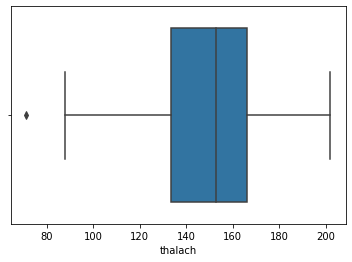

In [32]:
sns.boxplot(heart['thalach'])

In [33]:
heart = heart.replace('?', np.nan)

In [34]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
gender      303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fps         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          299 non-null object
thal        301 non-null object
class       303 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [35]:
heart.isnull().sum()

age         0
gender      0
cp          0
trestbps    0
chol        0
fps         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
class       0
dtype: int64

In [36]:
heart = heart.dropna()

In [37]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
age         297 non-null int64
gender      297 non-null int64
cp          297 non-null int64
trestbps    297 non-null int64
chol        297 non-null int64
fps         297 non-null int64
restecg     297 non-null int64
thalach     297 non-null int64
exang       297 non-null int64
oldpeak     297 non-null float64
slope       297 non-null int64
ca          297 non-null object
thal        297 non-null object
class       297 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 34.8+ KB


In [38]:
heart['ca'].unique()

array(['0', '3', '2', '1'], dtype=object)

In [39]:
heart['thal'].unique()

array(['6', '3', '7'], dtype=object)

In [40]:
heart['ca'] = pd.to_numeric(heart['ca'])

In [41]:
heart['thal'] = pd.to_numeric(heart['thal'])

In [42]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
age         297 non-null int64
gender      297 non-null int64
cp          297 non-null int64
trestbps    297 non-null int64
chol        297 non-null int64
fps         297 non-null int64
restecg     297 non-null int64
thalach     297 non-null int64
exang       297 non-null int64
oldpeak     297 non-null float64
slope       297 non-null int64
ca          297 non-null int64
thal        297 non-null int64
class       297 non-null int64
dtypes: float64(1), int64(13)
memory usage: 34.8 KB


In [46]:
heart.to_csv('heart_9.csv')